# tl;dr Intro to Bayesian Statistics

### You've heard of the debate
All data scientists have heard of the famous *frequentist-Bayesian controversy*. If you're like me, when you're asked the question, "Bayesian or a frequentist?" you just say "frequentist" because you're just guessing that Bayesian statistics has something to do with Bayes' Theorem, and you haven't used Bayes' Theorem since college when you had the [Monty-Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) on your homework. Am I alone? Quite possibly.

Anyways, the other day I finally came across an excellent, (potentially) real-world situation that clearly illustrates the difference between a Bayesian outlook and the frequentist outlook.

### The set-up
Just in case you're a lawyer, this example is entirely fictional and is taken directly from *Bayesian Methods for Data Analysis* by Carlin and Louis, and all characters and companies are fictious, any seeming correspondence to actual people and companies is purely a coincidence. Here's the set-up: it's November 2015, just a few weeks before Shmerger King starts wants to start selling hotdogs. You're a hotshot consultant hired to test whether or not people prefer hotdogs made out of mice (**case A**) or hotdogs made out of cats (**case B**).

Because of your time constraint, you were only able to (randomly) gather 25 people to sign up for your study. Here's your study: each person gets two hotdogs, one made out of mice and one made out of cats (the subjects don't know which hotdog is which), and you need to assess the probability that people genuinely prefer mice hotdogs (case A), and we're going to call this $\theta$. You ran the experiment and 20 people said they prefer mice hotdogs. So... what do you tell Shmerger King? What if this 80% mice hotdog preference was a fluke?

### Bayes-frequentist debate summed up
**Frequentists** will say this: $\theta$ is the average fraction of people that prefer mice hotdogs to cat hotdogs if you ran the experiment infinity times. If not infinity times, then at least like, a bunch of times. There's not enough time to repeat this experiment over and over hotshot!

**Bayesians** will say this: $\text{Prob}(\theta | data) \propto \text{likelihood}(data | \theta)\times \text{Prob}(\theta)$ 

^^Bayesians call $\text{Prob}(\theta | data)$ the *posterior probability* of $\theta$ . Now, it's up to you, the hotshot consultant, to postulate both a *likelihood* function that specifies the probability of the data given some value of $\theta$ and a *prior* distribution for $\theta$ itself. 

### Not that bad
Yeah, ok, Bayesians have to specify the likelihood function of the data and the prior for the missing parameter. Frequentists don't do this. But for this experiment, specifying a likelihood is pretty easy: Clearly, each subject's response should be independent from each of the other 24 subjects' response, and since there are just two outcomes, "mice hotdog preference" or "cat hotdog preference," the likelihood really lends itself to a binomial distribution. This is to say, if $\theta$ takes on some value, say 0.75, then the probability that 20/25 people will prefer the mice hotdogs is a lot higher than if $\theta = 0.3$. 

Priors are a little bit more complicated, because as a hotshot consultant you have to think about *what you genuinely believe* about the distribution of $\theta$. Maybe you think that people will really like the mice hotdogs because there's some literature out there about people eating mice. Maybe you have zero information about people's preferences. Maybe you're skeptical and you think that people won't be able to tell the difference between the hotdogs, suggesting that $\theta$ is probably centered around 0.5. A good pick for a prior distribution would be the beta distribution because it's really malleable, and it's actually a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) to the binomial distribution. More on conjugate priors below.

### Envisioning likelihood

The likelihood function defines the probability of observing the data (20 mice hotdog preferences in 25 trials) under a particular value of $\theta$. Below, we can see that if $\theta = 0.8$ (the frequentist estimate), there's a much higher probability that we see 20/25 mice hotdog preferences as opposed to when $\theta = 0.3$. If we kept going down this path, we'd probably just pick $\theta = 0.8$ because this is the parameter estimate that *maximizes likelihood*.

/Users/ffineis/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


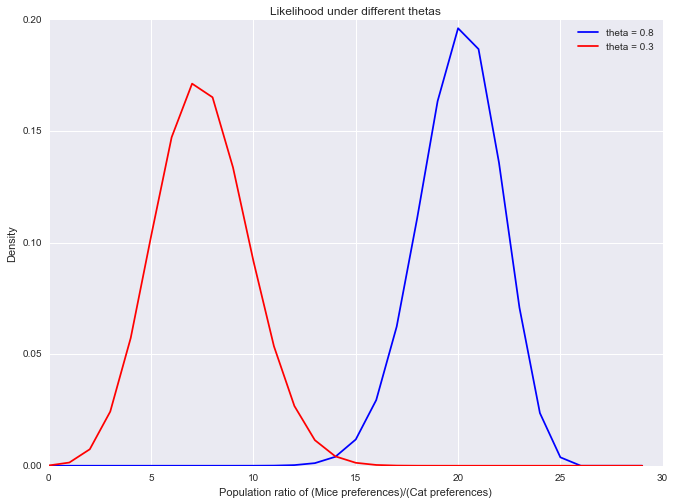

In [1]:
from scipy.stats import binom, beta
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,1, figsize = [11,8])

n = 25
p1 = 0.8; p2 = 0.3
x = np.arange(30) #Note that binomial distribution is discrete.
ax.plot(x, binom.pmf(x, n, p1), "b", label = "theta = 0.8")
ax.plot(x, binom.pmf(x, n, p2), "r", label = "theta = 0.3")
ax.legend(loc='best')
ax.set_title("Likelihood under different thetas")
ax.set_xlabel("Population ratio of (Mice preferences)/(Cat preferences)")
ax.set_ylabel("Density")

### Envisioning the prior

The prior distribution for $\theta$ allows you, the hotshot consultant, to inject your underlying believe about $\theta$, which is the proportion of all of Shmurger King's clientelle that really prefers mice hotdogs to cat hotdogs, the thing you're trying to pin down.

The beta distribution is a natural fit for the prior here:
- its support (the domain of values you can plug into the beta probability distribution function) is [0,1]
- Through its two parameters, $\alpha$ and $\beta$ (in Bayesian statistics, the parameters of your prior are called *hyperparameters*, the shape of the beta distribution is highly configurable
- It's the conjugate prior distribution to the binomial distribution (so, our likelihood function), which means that the posterior distribution (i.e. $P(\theta | data)$) is also a beta distribution, just with different parameters than the prior. That's what *conjugacy to the likelihood* means, that your posterior distribution is of the same type as your prior.

#### What do you think?
Bayesian statistics lets us inject our subjective beliefs into our models. Perhaps, you think one of the following statements is true:

- (1) You have absolutely no idea whether or not people prefer mice hotdogs over cat hotdogs
- (2) You think it's likely that people won't be able to tell the difference, so $\theta$ tends to be around 0.5
- (3) You think that people will either really love or really hate mice hotdogs, so $\theta$ will likely take on extreme values.

With the beta(1,1), beta(0.5, 0.5), and beta(2,2) distributions, respectively, we can emulate those scenarios:

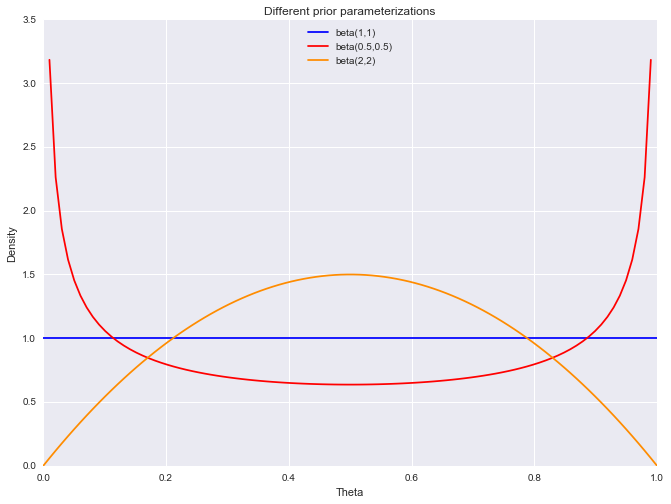

In [2]:
fig, ax = plt.subplots(1,1, figsize = [11,8])

## Define vector of potential theta values
theta = np.linspace(0,1,100)

## Plot prior distributions
ax.plot(theta, beta.pdf(theta, 1, 1), "b", label = "beta(1,1)")
ax.plot(theta, beta.pdf(theta, 0.5, 0.5), "r", label = "beta(0.5,0.5)")
ax.plot(theta, beta.pdf(theta, 2, 2), "DarkOrange", label = "beta(2,2)")
ax.legend(loc='best')
ax.set_title("Different prior parameterizations")
ax.set_xlabel("Theta")
ax.set_ylabel("Density")

### Putting it together: the posterior

Since the beta distribution is the conjugate prior to the binomial likelihood function (no derivation here), the posterior is also a beta distribution, only now $\alpha = \alpha_{prior} + \text{successes}$ and $\beta = n - \text{successes} + \beta_{prior}$. The derivation of the posterior's parameters involves multiplying the beta prior and binomial likelihood functions together, it's a big drawn out process. As a hotshot consultant, you'd probably just want to consult mathematica, Google, or the *Bayesian Methods for Data Analysis* book.

Anyway, the main point is that our choice of hyperparameters (i.e. how we parameterized the prior), will affect the posterior distribution. In plotting the resultant posterior distributions of $\theta$, notice that your choice for hyperparameters really doesn't change the shape or location of the posterior!

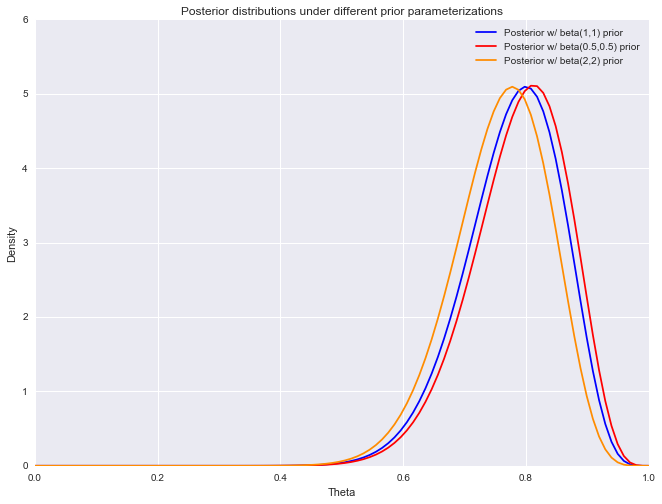

In [3]:
fig, ax = plt.subplots(1,1, figsize = [11,8])

## Observed data: number of successes
success = 20

## Plot posteriors
one_postr = beta.pdf(theta, 1+success, n-success+1)
five_postr = beta.pdf(theta, 0.5+success, n-success+0.5)
two_postr = beta.pdf(theta, 2+success, n-success+2)
ax.plot(theta, one_postr, "b", label = "Posterior w/ beta(1,1) prior")
ax.plot(theta, five_postr, "r", label = "Posterior w/ beta(0.5,0.5) prior")
ax.plot(theta, two_postr, "DarkOrange", label = "Posterior w/ beta(2,2) prior")
ax.legend(loc='best')
ax.set_title("Posterior distributions under different prior parameterizations")
ax.set_xlabel("Theta")
ax.set_ylabel("Density")

### Drawing conclusions
As you can see from the plots directly above, the posterior distribution's mode settles right around $\theta = 0.8$ across our three prior parameterizations. One of the benefits of a Bayesian analysis is that there's no ambiguity in what we mean by "confidence interval."

Remember the hoopla in your intro to stats class about confidence intervals? To frequentists, the term "confidence interval" means that "If I ran the experiment 100 times, about 95 of the confidence intervals that I estimate (I'm estimating the 95% confidence interval of $\theta$ in each experiment) will cover the true value of $\theta$." It's way easier in Bayesian statistics.

Now, you can finally say, "The probability that $\theta$ lies between a and b is 95%," and Bayesian statisticians call "confidence intervals" "credible sets."

All you do to get a "credible set" is find differences in cumulative densities of the posterior! Moreover, we can use the beta cumulative density function to assess the probability that $\theta$ is greater than some value that the Schmerger King execs will be happy with, such as $\theta = 0.6$, under each prior distribution:

In [4]:
# Find posterior modes
posteriors = np.array([one_postr, five_postr, two_postr])
modes = theta[np.apply_along_axis(np.argmax, 1, posteriors)]

# Calculate credible intervals
posterior_params = np.array([[1+success, n-success+1], [0.5+success, n-success+0.5], [2+success, n-success+2]])
CI = np.zeros(3)
for i in range(posterior_params.shape[0]):
    CI[i] = beta.cdf(1, posterior_params[i, 0], posterior_params[i, 1]) - \
            beta.cdf(0.6, posterior_params[i, 0], posterior_params[i, 1])
    print "Under prior distribution {} we are {:.2f}% sure that theta > 0.6.".format(i+1, 100*CI[i])

Under prior distribution 1 we are 97.86% sure that theta > 0.6.
Under prior distribution 2 we are 98.28% sure that theta > 0.6.
Under prior distribution 3 we are 96.85% sure that theta > 0.6.


Given that we've made some pretty reasonable assumptions for the likelihood and prior distributions, you can safely report that people firmly prefer mice hotdogs to cat hotdogs. 